In [16]:
from file import readFile
import pandas as pd
from prophet import Prophet
from flow import generByPark
# dailyHisata = readFile('dailies-scan')
dailyHisata = readFile('dailies-report')
# dailyData = readFile('dailies')

In [17]:
allData = dailyHisata

In [18]:
dataset = allData
dataset = allData.query('park=="usb"')
dataset['mark'] = (dataset['max'] / dataset['max'].max()) #* 100
dataset['mark'] = dataset['mark'] * 100
dataset = dataset.query('mark>0')
# dataset = allData.query("park=='shdr'")
# dataset = allData.query('max>0')
# dataset = allData.query('pptTotal<1')
dataset

/var/folders/7y/d40kdrfn7dvf9v9n99q6qbjh0000gn/T/ipykernel_77586/3552836190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['mark'] = (dataset['max'] / dataset['max'].max()) #* 100
/var/folders/7y/d40kdrfn7dvf9v9n99q6qbjh0000gn/T/ipykernel_77586/3552836190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['mark'] = dataset['mark'] * 100


,date,park,attractions,endTime,hours,max,rows,startTime,state,total,...,weathers.live.humidity,weathers.live.precip,weathers.live.pressure,weathers.live.vis,weathers.live.cloud,weathers.live.dew,analysis.sources.34,tickets.standbyPass,analysis.sources.11,mark
dateIndex,,,,,,,,,,,,,,,,,,,,,
2022-01-05,2022-01-05,usb,[{'name': '5fa247615ba7f1491f6289a2;entityType...,19:00,"[[10, 152], [11, 320], [12, 325], [13, 262], [...",361.0,"[[1641348300, 96], [1641348600, 106], [1641348...",10:00,None,27172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.244755
2022-01-09,2022-01-09,usb,[{'name': '5fa247615ba7f1491f6289a2;entityType...,19:00,"[[9, 96], [10, 180], [11, 234], [12, 202], [13...",273.0,"[[1641690300, 83], [1641690600, 85], [16416909...",09:00,None,22542.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.090909
2022-01-02,2022-01-02,usb,[{'name': '5fa247615ba7f1491f6289a2;entityType...,19:00,"[[9, 150], [10, 322], [11, 443], [12, 407], [1...",468.0,"[[1641085500, 99], [1641085800, 105], [1641086...",09:00,None,41169.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.727273
2022-01-03,2022-01-03,usb,[{'name': '5fa247615ba7f1491f6289a2;entityType...,20:00,"[[9, 339], [10, 733], [11, 919], [12, 1005], [...",1043.0,"[[1641171900, 146], [1641172200, 167], [164117...",09:00,None,104720.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.937063
2022-01-04,2022-01-04,usb,[{'name': '5fa247615ba7f1491f6289a2;entityType...,19:00,"[[10, 166], [11, 385], [12, 413], [13, 326], [...",463.0,"[[1641261900, 85], [1641262200, 90], [16412625...",10:00,None,33036.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.377622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,2023-08-27,usb,[{'name': '5fa247615ba7f1491f6289a2;entityType...,21:00:00,"[[9, 460], [10, 745], [11, 610], [12, 546], [1...",790.0,"[[1693098300, 255], [1693098600, 255], [169309...",09:00:00,Operating,66870.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,55.244755
2023-08-28,2023-08-28,usb,[{'name': '5fa247615ba7f1491f6289a2;entityType...,21:00:00,"[[9, 517], [10, 894], [11, 815], [12, 670], [1...",970.0,"[[1693184700, 270], [1693185000, 330], [169318...",09:00:00,Operating,77735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,67.832168
2023-08-29,2023-08-29,usb,[{'name': '5fa247615ba7f1491f6289a2;entityType...,21:00:00,"[[9, 400], [10, 685], [11, 471], [12, 269], [1...",730.0,"[[1693271100, 215], [1693271400, 235], [169327...",09:00:00,Operating,51370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,51.048951


/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.2441
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       859.393    0.00064667       93.6845   7.306e-06       0.001      153  LS failed, Hessian reset 
      99       859.413   0.000112954       73.7895      0.3764           1      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       859.451   9.42663e-05       73.6678      0.7078      0.7078      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       859.502   6.03225e-05       85.5445   7.283e-07       0.001      416  LS failed, Hessian reset 
     299       859.525   0.000101524       68.7525      0.3414           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       859.532    2.4443e-08        62.787      0.3342           1      570   
Optimization terminat

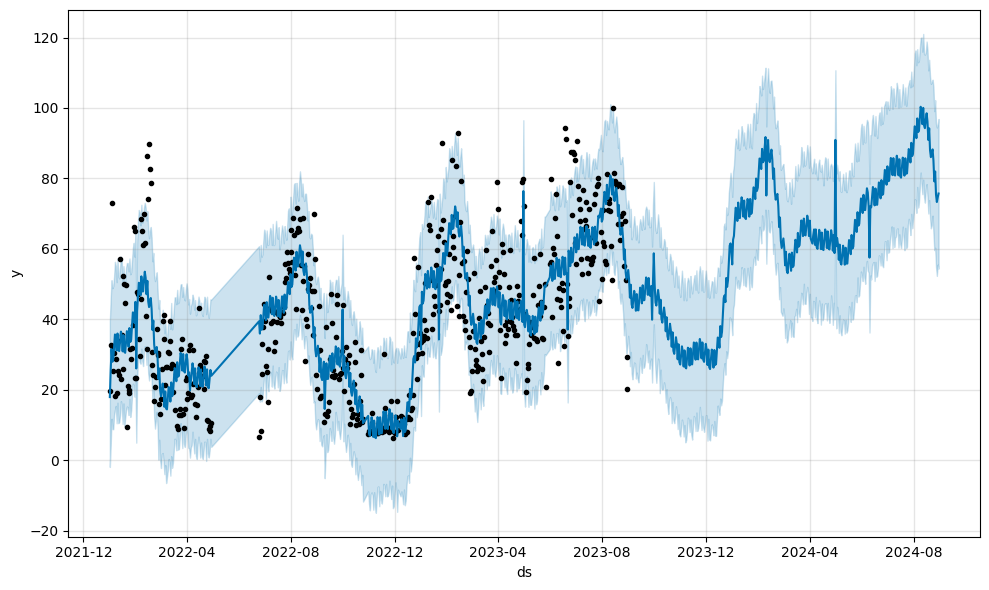

In [19]:
dataset['dateInde'] = pd.to_datetime(dataset['date'])
dataset = dataset.set_index('dateInde', drop=True)

# dataset = dataset.drop(dataset.loc['2016'].index)
# dataset = dataset.drop(dataset.loc['2017'].index)
# dataset = dataset.drop(dataset.loc['2018'].index)
# dataset = dataset.drop(dataset.loc['2019'].index)
# dataset = dataset.drop(dataset.loc['2020'].index)
# dataset = dataset.drop(dataset.loc['2021'].index)
# dataset = dataset.drop(dataset.loc['2022'].index)

# dataset = dataset.drop(dataset.loc['2023'].index)
parks = [
  'usb'
  # 'fldw',
  # 'flak',
  # 'flhs',
  # 'fle',
  # 'cadp',
  # 'cadap',
  # 'hkdl',
  # 'tkydl',
  # 'tkys',
  # 'pardl',
  # 'pardsl',
  # 'ush',
  # 'usf',
  # 'usfa',
  # 'usj'
]

for park in parks:
  generByPark(park, dataset)


In [20]:
# from holiday import holidays
# allholidays = [] # holidays() 
# m = Prophet(
#   yearly_seasonality = True,
#   weekly_seasonality = True,
#   daily_seasonality = True,
#   seasonality_prior_scale = 20,
#   holidays_prior_scale = 20,
#   interval_width = 0.9
# )
# m.add_country_holidays(country_name='US')
# m.fit(data)
# future = m.make_future_dataframe(periods=365)
# forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# fig1 = m.plot(forecast)

# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# forecast.to_csv('forecast.csv')

In [21]:
# from neuralprophet import NeuralProphet
# from sklearn.metrics import mean_squared_error
 
# # plotting
# import matplotlib.pyplot as plt
# nprophet_model = NeuralProphet()

# m = nprophet_model.fit(data, freq="D")
# forecast = m.predict(data)
# m.plot(forecast)
# preds_df_2 = nprophet_model.predict(future_df)
# nprophet_model.plot(preds_df_2)

In [22]:
# from prophet.diagnostics import cross_validation
# df_cv = cross_validation(m, initial='1130 days', period='180 days', horizon = '365 days')
# df_cv.head()


In [23]:
# fig2 = m.plot_components(forecast)

In [24]:
# from holidays import country_holidays

# us_holidays = country_holidays('CN', years=2017)

# for day in us_holidays.items():
#     print(day)

# pd.date_range(start='2018-08-08', end = '2018-08-15', freq='D')
# pd.to_datetime(['2018-08-08'])
